In [1]:
import pandas as pd
from path import Path 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
file = Path('crypto_data.csv')

In [5]:
df = pd.read_csv(file, index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [6]:
#list all algorithms in use
algorithms = set(df.Algorithm.values)
print(algorithms)

{'X15', 'DPoS', 'X13', 'Quark', 'M7 POW', 'SHA-512', 'C11', 'Lyra2Z', 'Equihash+Scrypt', 'X16S', 'POS 2.0', 'X11', 'Stanford Folding', 'Leased POS', 'Lyra2REv2', 'XG Hash', 'QuBit', 'Green Protocol', 'Shabal256', 'Semux BFT consensus', 'TRC10', '1GB AES Pattern Search', 'Equihash1927', 'CryptoNight', 'Blake', 'SHA-256D', 'Exosis', 'CryptoNight-lite', 'X14', 'Cryptonight-GPU', 'Skein', 'CryptoNight Heavy', 'Rainforest', 'Tribus', 'QuarkTX', 'Counterparty', 'PHI2', 'Wild Keccak', 'Ouroboros', 'Jump Consistent Hash', 'CryptoNight-Lite', 'Slatechain', 'QUAIT', 'Cloverhash', '536', 'SHA3', 'Lyra2RE', 'IMesh', 'SkunkHash v2 Raptor', 'Groestl', 'PHI1612', 'Scrypt-n', 'Keccak', 'Argon2d', 'SkunkHash', 'NIST5', 'CryptoNight Heavy X', 'Dagger', 'Multiple', 'Dagger-Hashimoto', 'BLAKE256', 'XEVAN', 'T-Inside', 'Scrypt', 'Argon2', 'Curve25519', 'Momentum', 'YescryptR16', 'vDPOS', 'Equihash', 'VeChainThor Authority', 'HMQ1725', 'M00N', 'NeoScrypt', 'Zhash', 'SHA3-256', 'Ethash', 'POS 3.0', 'Blake2S'

In [7]:
#print the counts of stocks being currently traded vs. not being currently traded
df["IsTrading"].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [9]:
#select only cryptocurrencies that are being traded
df = df.loc[df["IsTrading"]==True]
df["IsTrading"].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [10]:
#delete the IsTrading column; no longer necessary to keep
df = df.drop("IsTrading", axis = 1)
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [11]:
#delete all rows with null values
df = df.dropna(axis=0, how='any')
df.shape

(685, 5)

In [12]:
#sort values in TotalCoinsMined to identify negative or zero values
df.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [14]:
#select only rows with positive TotalCoinsMined values
df = df[df['TotalCoinsMined']>0]
len(df)

532

In [15]:
#delete te CoinName column from the original dataframe
df = df.drop("CoinName", axis = 1)
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [18]:
#create dummy variables for columns with string values
x = pd.get_dummies(data=df, columns=["Algorithm","ProofType"])
print(x.shape)
x.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [20]:
#print the scaled data
x_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [22]:
#identify the number of rows and oclumns in the scaled data
x_scaled.shape

(532, 98)

In [23]:
#with 99% of the data
pca = PCA(n_components=0.99)
prin_components = pca.fit_transform(x_scaled)
prin_components.shape

(532, 86)

In [25]:
pca.explained_variance_.sum()

88.4728345756615

In [24]:
#reduce the dimensions with PCA
pca = PCA(n_components=0.90)
prin_components = pca.fit_transform(x_scaled)
prin_components.shape

(532, 74)

In [26]:
#the sum of the explained variance of the principal components
pca.explained_variance_.sum()

88.4728345756615

In [27]:
#reduce the dimensions with T-SNE
tsnel = TSNE(perplexity=50)
tsnelFeatures = tsnel.fit_transform(prin_components)
tsnelFeatures.shape

(532, 2)

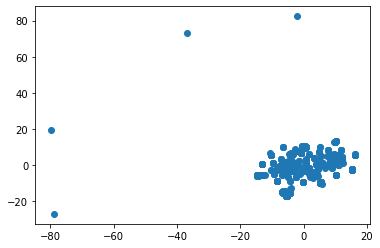

In [28]:
#plot t-SNE output
x = tsnelFeatures[:,0]
y = tsnelFeatures[:,1]

plt.scatter(x,y)
plt.show()

In [31]:
#identify the cluster with k-means
inertia = []
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for value in k:
    kmeans = KMeans(n_clusters = value, random_state = 0)
    kmeans.fit(prin_components)
    inertia.append(kmeans.inertia_)

C:\Users\14043\Downloads\Newfolder\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


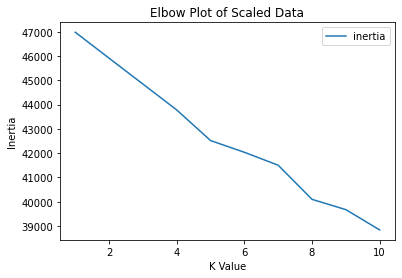

In [36]:
elbowPlot = pd.DataFrame({"K": k,"inertia": inertia})
elbowPlot.plot.line(x = "K", y = "inertia")
plt.ylabel("Inertia")
plt.xlabel ("K Value")
plt.title ("Elbow Plot of Scaled Data")
plt.show()

Looking at our Elbow Plot that we have produced we can see that it would not be beneficial for investors to invest in the current market. This is because the number of groups that we have produced cannot be condensed into singular clusters.